In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

## Forutune 2000 company model 

In [2]:
# Reading data from csv file 
data = pd.read_csv('data/new_data.csv')
# splitting labels and features 
X = data.drop(['Rank','Name'],axis=1)
Y = data['Rank']
# converting Country into numeric data
X_transformed = pd.get_dummies(X)

In [3]:
# importing and splitting data into test and train data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_transformed,Y,test_size=0.4)

In [4]:
from sklearn.ensemble import RandomForestRegressor

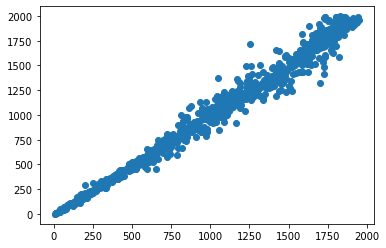

In [5]:
# training and testing data
model = RandomForestRegressor()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
plt.scatter(y_pred,y_test);

In [6]:
model.score(x_test,y_test)

0.9797782613856747

## California housing model  

In [27]:
data = pd.read_csv('data/housing.csv')
data.median_house_value = data.median_house_value.apply(lambda x: x/1000)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452.6,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358.5,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352.1,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341.3,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342.2,NEAR BAY


In [28]:
data.median_house_value

0        452.6
1        358.5
2        352.1
3        341.3
4        342.2
         ...  
20635     78.1
20636     77.1
20637     92.3
20638     84.7
20639     89.4
Name: median_house_value, Length: 20640, dtype: float64

In [29]:
data.fillna(value=data.total_bedrooms.mean(),inplace=True)

In [30]:
data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = data.drop('median_house_value',axis=1)
Y = data.median_house_value

X_transformed = pd.get_dummies(X)

In [33]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor(n_estimators=1000)
x_train,x_test,y_train,y_test = train_test_split(X_transformed,Y,test_size=0.2)
model3.fit(x_train,y_train)

RandomForestRegressor(n_estimators=1000)

### Score

In [34]:
model3.score(x_test,y_test)

0.8244700748312597

### R2 score (R^2)

In [25]:
from sklearn.metrics import r2_score
y_preds = model3.predict(x_test)
r2_score(y_test,y_preds)

0.8270710993243066

### Mean absolute error (MAE)

In [26]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

30.796968287064086

### Mean Squared error (MSE)

In [27]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_preds)

2294.472813524979

### Cross validate score 

In [21]:
from sklearn.model_selection import cross_val_score
sco = cross_val_score(model3,X_transformed,Y,scoring=None)
sco

array([0.33361435, 0.60966178, 0.70617924, 0.22797374, 0.65025714])

In [13]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.6504743394158707

In [10]:
from sklearn.svm import SVR
model2 = SVR(kernel='linear')
model2.fit(x_train,y_train)
model2.score(x_test,y_test)

0.3565964152155673

In [31]:
# Best fit model 
y_pred = model3.predict(x_test)
y_pred[:10]

array([314.134943, 195.272701, 276.391503, 225.756501, 130.9339  ,
       287.760495, 254.6328  , 191.5011  , 134.2771  , 154.4603  ])

In [32]:
np.array(y_test[:10])

array([336.4, 129.2, 384.6, 207.3, 133. , 280. , 219.5, 204.2, 135.5,
       189.4])

In [35]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_pred,y_test)
model3.score(x_test,y_test)

0.8260910789627183

In [22]:
from sklearn.linear_model import Lasso
model4 = Lasso(max_iter=2000)
model4.fit(x_train,y_train)
model4.score(x_test,y_test)

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.314e+12, tolerance: 2.188e+10
  model = cd_fast.enet_coordinate_descent(


0.6587221705479223

In [23]:
from sklearn.linear_model import ElasticNet
model5 = ElasticNet()
model5.fit(x_train,y_train)
model5.score(x_test,y_test)

0.6254105436410553

## heart disease model 

In [35]:
data = pd.read_csv('data/heart.csv')
from sklearn.model_selection import train_test_split
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [36]:
X = data.drop('target',axis=1)
Y = data.target

In [37]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.4)

In [38]:
np.random.seed(40)
from sklearn.svm import LinearSVC
clf = LinearSVC(max_iter=1000)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8512195121951219

In [39]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier()
clf2.fit(x_train,y_train)
clf2.score(x_test,y_test)

0.975609756097561

In [36]:
# Prediction with 'predict_proba'
y_proba = clf2.predict_proba(x_test)
y_proba_pos = y_proba[:,1]

In [37]:
clf2.predict(x_test[:5])

array([1, 0, 0, 1, 0], dtype=int64)

In [38]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf2,X,Y,cv=10)

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.97058824, 1.        ])

In [39]:
# The cross_validation_score method splits the data into equal 'cv' number of parts and takes out the score of each set 
np.mean(cross_val_score(clf2,X,Y,cv=10)) # The mean score of the cross validation score method

0.9970588235294118

### ROC Curve

In [42]:
# Evalutating our model using ROC curve 
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_test,y_proba_pos)

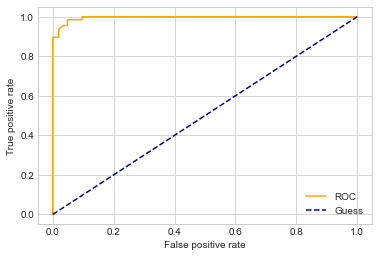

In [43]:
def display_roc_curve(fpr,tpr):
    plt.style.use('seaborn-whitegrid')
    plt.plot(fpr,tpr,color='orange',label='ROC')
    plt.plot([0,1],[0,1],label='Guess',color='darkblue',linestyle='--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.legend()
    
display_roc_curve(fpr,tpr)


### Confusion matrix
#### It gives us the no of right predictions and no. of wrong prediction

In [9]:
from sklearn.metrics import confusion_matrix

In [10]:
y_preds = clf2.predict(x_test)
mat = confusion_matrix(y_test,y_preds)

In [8]:
pd.crosstab(y_test,y_preds,rownames=['Actual Labels'],colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,187,0
1,3,220


In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

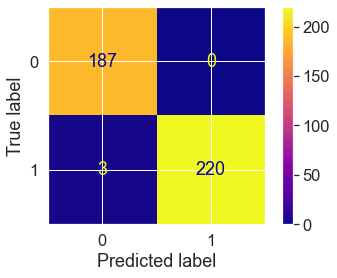

In [24]:
ConfusionMatrixDisplay.from_predictions(y_test,y_preds,cmap='plasma');

### Classification report 

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       205
           1       0.98      0.97      0.98       205

    accuracy                           0.98       410
   macro avg       0.98      0.98      0.98       410
weighted avg       0.98      0.98      0.98       410



### Cross Val Score

In [43]:
from sklearn.model_selection import cross_val_score
cos = cross_val_score(clf2,X,Y,scoring='recall',cv=5)
cos

array([1., 1., 1., 1., 1.])